# Importing libraries

In [3]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

# Loading and preparing the data

In [4]:
#import dataset and split into train and test
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


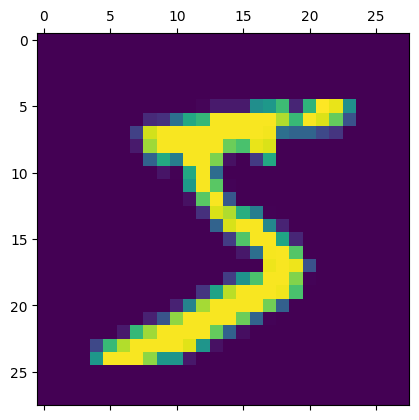

In [5]:
#to see how first image looks
plt.matshow(x_train[0])

In [6]:
#normalising the images by scaling the pixel intensities to the range 0 to 1
x_train = x_train / 255
x_test = x_test / 255

# Creating the model

In [7]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation = 'relu'),
    keras.layers.Dense(10,activation = 'softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

# Compile the model

In [9]:
model.compile(optimizer = 'sgd',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

# Train the model

In [10]:
history = model.fit(x_train,y_train,validation_data = (x_test,y_test), epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7397 - loss: 1.0443 - val_accuracy: 0.9037 - val_loss: 0.3556
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.9030 - loss: 0.3482 - val_accuracy: 0.9192 - val_loss: 0.2907
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9185 - loss: 0.2888 - val_accuracy: 0.9267 - val_loss: 0.2595
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9257 - loss: 0.2652 - val_accuracy: 0.9313 - val_loss: 0.2386
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9348 - loss: 0.2340 - val_accuracy: 0.9378 - val_loss: 0.2183
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9388 - loss: 0.2188 - val_accuracy: 0.9423 - val_loss: 0.2047
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9416 - loss: 0.2058 - val_accuracy: 0.9458 - val_loss: 0.1924
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9467 - loss: 0.190

# Evaluate the model

In [11]:
test_loss,test_acc = model.evaluate(x_test,y_test)
print("Loss = %.3f" %test_loss)
print("Accuracy = %.3f" %test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9455 - loss: 0.1918
Loss = 0.164
Accuracy = 0.954


# Make prediction on new data

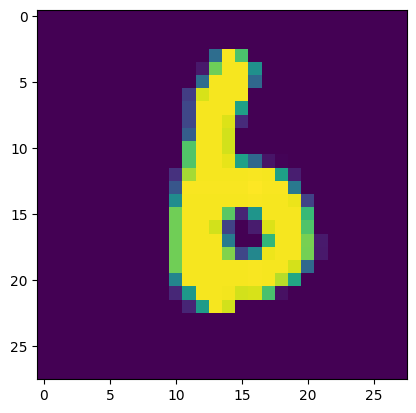

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
predicted_value [2.91228480e-06 8.37301079e-04 4.33157868e-04 1.59573276e-03
 8.45810646e-05 1.02759426e-04 9.95159268e-01 2.91876717e-07
 1.74043747e-03 4.34213362e-05]


In [12]:
n = random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()
predictions = model.predict(x_test)
print("predicted_value",predictions[n])

# Plotting the Model Accuracy & Model Loss vs Epoch

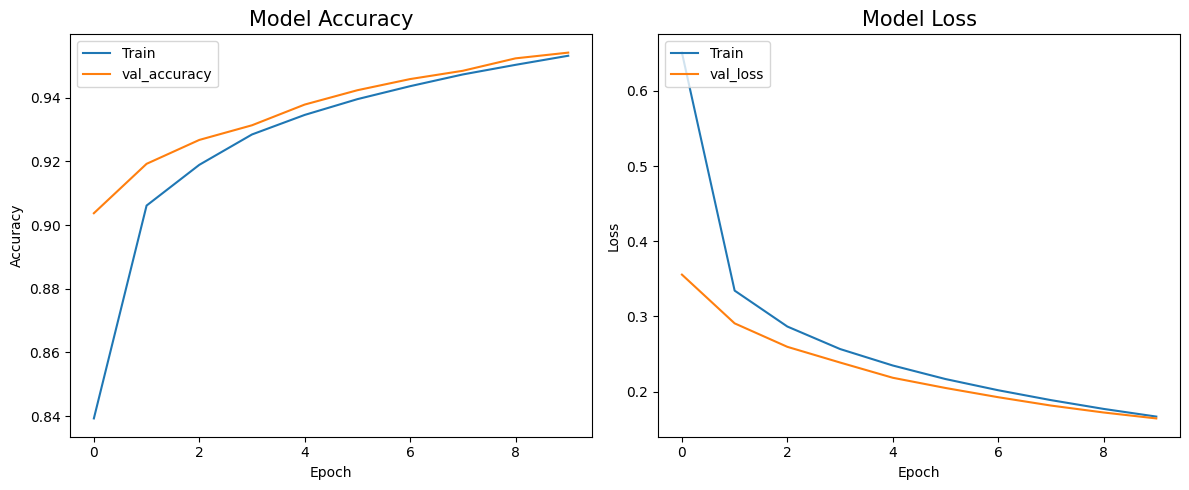

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Accuracy plot
axes[0].plot(history.history['accuracy'], label='Train')
axes[0].plot(history.history['val_accuracy'], label='val_accuracy')
axes[0].set_title('Model Accuracy', size=15)
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend(loc='upper left')

# Loss plot
axes[1].plot(history.history['loss'], label='Train')
axes[1].plot(history.history['val_loss'], label='val_loss')
axes[1].set_title('Model Loss', size=15)
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend(loc='upper left')

plt.tight_layout()
plt.show()

In [14]:
test_predict = model.predict(x_test)
#get classification labels
test_predict_labels = np.argmax(test_predict,axis = 1)
confusion_matrix = tf.math.confusion_matrix(labels = y_test, predictions = test_predict_labels)
print('Confusion Matrix of the Test Set :\n' , confusion_matrix)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Confusion Matrix of the Test Set :
 tf.Tensor(
[[ 965    0    1    3    0    4    5    1    1    0]
 [   0 1117    3    2    1    1    3    2    6    0]
 [   7    1  976   11    9    4    5    7    9    3]
 [   0    0    6  973    0   12    0    8    7    4]
 [   1    2    4    0  940    0    9    3    2   21]
 [   8    3    2   25    2  829    9    1    7    6]
 [  11    3    1    2    6    9  923    1    2    0]
 [   2    9   18    8    2    1    0  974    2   12]
 [   7    5    4   17    5    8   10    8  904    6]
 [  11    7    1   14   22    5    1    6    2  940]], shape=(10, 10), dtype=int32)
